In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [77]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [80]:
col_to_scale=['CreditScore','Balance','EstimatedSalary','Age']
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
df[col_to_scale]=Scaler.fit_transform(df[col_to_scale])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400,0


In [81]:
def print_uniq_value(df):
    for col in df:
        print(f'{col}:{df[col].unique()}')

In [82]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
print_uniq_value(df)

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [83]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2988,0.678,0,0.391892,1,0.374144,3,1,0,0.784409,1,1,0,0
8692,1.000,1,0.189189,8,0.000000,2,1,1,0.277938,0,1,0,0
5147,0.638,1,0.270270,9,0.485691,1,1,0,0.653781,0,1,0,0
4293,0.766,0,0.351351,3,0.422765,1,0,1,0.508078,0,0,0,1
5697,0.434,0,0.283784,5,0.000000,2,0,0,0.842631,0,1,0,0


In [84]:
print_uniq_value(df1)

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [87]:
X=df1.drop(['Exited'],axis='columns')
y=df1['Exited']
y.shape

(10000,)

In [89]:
X.columns.size

12

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [95]:
X_train.shape

(8000, 12)

In [105]:
model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 533us/step - loss: 0.6297 - accuracy: 0.7195
Epoch 2/100
250/250 [==============================] - 0s 733us/step - loss: 0.4742 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 550us/step - loss: 0.4486 - accuracy: 0.7986
Epoch 4/100
250/250 [==============================] - 0s 552us/step - loss: 0.4264 - accuracy: 0.8086
Epoch 5/100
250/250 [==============================] - 0s 520us/step - loss: 0.4100 - accuracy: 0.8139
Epoch 6/100
250/250 [==============================] - 0s 608us/step - loss: 0.3973 - accuracy: 0.8169
Epoch 7/100
250/250 [==============================] - 0s 590us/step - loss: 0.3886 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 761us/step - loss: 0.3813 - accuracy: 0.8179
Epoch 9/100
250/250 [==============================] - 0s 591us/step - loss: 0.3779 - accuracy: 0.8255
Epoch 10/100
250/250 [==============================] - 0s 499us/step - l

In [110]:
yp=model.predict(X_test)

In [112]:
y_pred=[]
for element in yp:
    if(element>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [114]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.43      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

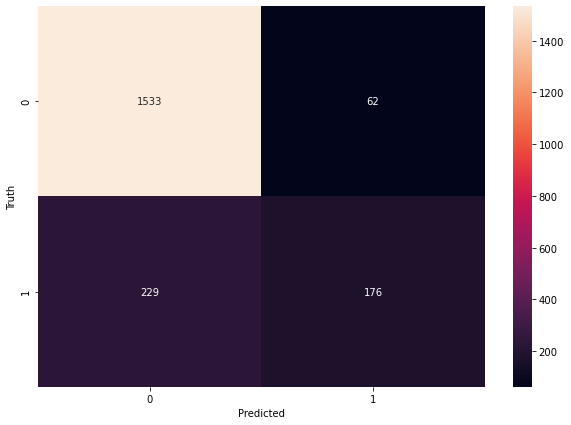

In [125]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')